

# Generación de datos sintéticos y almacenamiento de información

Francisco Jurado

<francisco.jurado@uam.es>

---


## Contenidos

1. Creación de datos sintéticos
2. Generación masiva de datos
3. Almacenamiento en ficheros
4. Almacenamiento en sistemas gestores de BBDD
5. Uso de funciones generadoras
6. Aplicando funciones de distribución


## 1. Creación de datos sintéticos


### ¿Qué son los datos sintéticos?

La Agencia Española de Protección de Datos define los datos sintéticos como _'datos generados artificialmente, a diferencia de los datos reales que se recopilan de la realidad’_.
[AEPD: datos sintéticos](https://www.aepd.es/prensa-y-comunicacion/blog/datos-sinteticos-y-proteccion-de-datos)

Cuando no existen o no se cuentan con datos reales, los datos sintéticos mantienen las características y propiedades de los datos reales. 

Resultan especialmente útiles para en las fases de desarrollo, prueba y validación.


### Creación de datos sintéticos en Python con Faker

Faker es una librería para generar datos sintéticos disponible en varios lenguajes de programación
Para Python: [joke2k/faker](https://github.com/joke2k/faker)

Lo instalaremos con:

```bash
pip install Faker
```

Y ya se podrá importar e instanciar un objeto Faker del siguiente modo:

In [315]:
from faker import Faker

fake = Faker('es_ES')    # Puede establecerse un `locale` 
                         # para que los datos se generen 
                         # de acuerdo a él

Faker dispone de un amplio conjunto de métodos para generar información aleatoria. Veamos algunos...

In [316]:
fake.first_name()

'Teo'

In [317]:
fake.last_name()

'Reig'

In [318]:
fake.name_female()

'Teresa de Cabello'

In [319]:
fake.phone_number()

'+34 816 51 33 38'

In [320]:
fake.address()

'Rambla de León Sevillano 81\nAlmería, 43738'

In [321]:
fake.city()

'Ávila'

In [322]:
fake.text() # Lorem Ipsum (Latín)

'Seis cerca entrar rodríguez. Interior hospital nombre programas.\nRelaciones constitución explicó cuya formación. Manera usted puede estructura. Actitud vez experiencia jefe.'

In [323]:
fake.sentences()

['Comenzó noche vivir eran antonio boca.',
 'Cara muerto etapa del posición.',
 'N cada grandes nombre corte aspecto hacerlo.']

In [324]:
fake.job()

'Especialista en ciencias políticas'

In [325]:
fake.company()

'Distribuciones Ríos y asociados S.Coop.'

In [326]:
fake.ascii_company_email()

'marigracia@desarrollo.net'

In [327]:
[fake.ascii_free_email() for _ in range(5)]

['herminio48@yahoo.com',
 'vicenta01@hotmail.com',
 'clloret@gmail.com',
 'maria-manuela24@gmail.com',
 'jroma@gmail.com']

In [328]:
fake.ipv4_private()

'10.76.80.215'

### Proveedores para la generación de datos
¿Y si necesito algo que Faker no genere? → Proveedores (providers)

Pueden encontrarse proveedores concretos en las siguientes listas:

- Proveedores estándar, incluidos por defecto: [Providers](https://faker.readthedocs.io/en/stable/providers.html)
- Community Providers, desarrollados por la comunidad: [Community Providers](https://faker.readthedocs.io/en/stable/communityproviders.html)
- En Github pueden encontrarse proveedores para datos concretos. Se recomienda ser cauto y revisar el código antes de emplearlos.

Si los providers estándar o los proporcionados por la comunidad, no proporcionan algo que resulte necesario, pueden implementarse nuevos extendiendo la clase BaseProvider y  añadiéndolo al objeto Faker.

A modo de ejemplo, el veamos el código que implementa un proveedor para generar números de DNI.

In [329]:
from faker.providers import BaseProvider

class DNIProvider(BaseProvider):
   ''' Provider para generar DNI '''
   __letters = 'TRWAGMYFPDXBNJZSQVHLCKE' # letras válidas del dígito de control

   def dni_number(self) -> int:
      ''' Genera un número de DNI con un máximo de 8 dígitos '''
      return fake.unique.random_int(min=111111, max=99999999) # número de 8 dígitos

   def dni_control_letter(self, num):
      ''' Genera la letra de control para el número de DNI proporcionado por parámetro ''' 
      return self.__letters[num % 23] # la letra de control

   def dni(self) -> str:
      ''' Genera una cadena con los ocho dígitos del número de dni y la letra de 
          control separados por un guión '''
      num = self.dni_number()
      control = self.dni_control_letter(num)
      return f'{num:08d}-{control}'
   

fake.add_provider(DNIProvider) # Añade el provider a fake para que pueda usar sus métodos

Ahora puede usarse del siguiente modo:

In [330]:
dni_number = fake.dni_number()
dni_letter = fake.dni_control_letter(dni_number)
print(f'{dni_number:08d} {dni_letter}')  # Muestra el número de DNI con 8 dígitos y la letra de control

73339000 G



O bien directamente:

In [331]:
fake.dni()

'04946725-T'

## 2. Generación masiva de datos

A modo de ejemplo, generemos datos de usuarios, almacenando la información en una lista de diccionarios python. 

Fíjese en el atributo `unique` del generador para garantizar que cualquier valor generado sea único para esta instancia específica.


In [332]:
%pip install tqdm


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [333]:
from tqdm import tqdm # Para mostrar una barra de progreso en los iteradores.
                      # Útil cuando la cantidad de información a generar es grande y 
                      # se quiere tener información del progreso
def generate_data(how_much = 1000000) -> list:
   '''Genera una lista de diccionarios con datos aleatorios sobre personas. 
      Por defecto 1.000.000 entradas.'''
   data = []
   
   for _ in tqdm(range(how_much), desc='Generating data'): 
      data.append({'Name': fake.name(),
                   'Age': fake.random_int(min=18, max=80, step=1),
                   'IdNumber': fake.unique.dni(),
                   'Address': fake.unique.street_address(),
                   'City': fake.city(),
                   'State': fake.state(),
                   'PostCode': fake.postcode(),
                   'Phone': fake.unique.phone_number()})
   return data


Supongamos que se desean generar 10.000 entradas de datos ficticios.

In [334]:
data = generate_data(10000)

Generating data: 100%|██████████| 10000/10000 [00:00<00:00, 11245.20it/s]


Prueba a generar 10.000, 100.000, 1.000.000, etc.

In [335]:
# Escribe tu código aquí

### Trabajando con DataFrame

Ahora, podría cargarse el diccionario en un `DataFrame` de Pandas para su posterior manipulación...

In [336]:
import pandas as pd
df = pd.DataFrame(data)

Limitaciones de Pandas en la generación de datos:

- Consumo de memoria
  - Pandas carga todos los datos en memoria.
  - Cuello de botella en datasets grandes (ej. generate_data(how_much=1000000)).
- Rendimiento limitado
  - No está optimizado para procesamiento paralelo ni para operaciones distribuidas.
- Dependencia innecesaria
  - Si solo se necesita escribir o leer datos (CSV, JSON, Parquet, etc.), usar Pandas puede ser excesivo.
- Tiempo de carga
  - Pandas puede tardar más en inicializar y procesar datos, especialmente si hay conversión de tipos o estructuras complejas.
- Entornos restringidos
  - En sistemas embebidos, microservicios o contenedores ligeros, instalar Pandas puede ser costoso en términos de tamaño y dependencias.
- Tipos de datos limitados
  - Pandas no soporta bien tipos complejos como listas, structs, o mapas que sí puedes usar con JSON o Parquet.


## 3. Almacenamiento en ficheros

### Trabajando con CSV (Comma Separated Values)

* Formato de texto plano.
* Almacena información orientada a filas.
* Almacena datos estructurados en forma de tabla, usando comas (a veces punto y coma) para separar los valores de cada columna en cada fila. 
* Formato sencillo, universal y muy usado para importar y exportar datos entre diferentes programas y bases de datos.

In [337]:
import csv

def write_to_csv(data, filename):
   with open(filename, 'w') as output:
      csv_writer = csv.writer(output)
      csv_writer.writerow(data[0].keys()) # Escribimos la cabecera
      for row in data:
         csv_writer.writerow(row.values()) # Escribimos los datos

In [338]:
write_to_csv(data, 'fakeData.csv')

### Trabajando con JSON (JavaScript Object Notation)

* Formato de texto plano.
* Legible por humanos para almacenar e intercambiar datos estructurados. 
* Sintaxis basadas en pares clave-valor.
* Compatible con la mayoría de los lenguajes de programación
    - Ideal para la comunicación de datos en diversas plataformas y lenguajes.
* Utilizado en aplicaciones web para el intercambio de datos cliente servidor, como formato estándar para el intercambio de datos entre aplicaciones mediante APIs, para almacenar y organizar información en bases de datos NoSQL, archivos de configuración, etc.

Generar JSON

In [339]:
import json
import pprint

pprint.pp(json.dumps(data[1:5], indent = 4)) # imprimirá los 5 primeros en 
                                             # JSON con indentación de 4

('[\n'
 '    {\n'
 '        "Name": "Rosario Hurtado Lasa",\n'
 '        "Age": 28,\n'
 '        "IdNumber": "94235076-M",\n'
 '        "Address": "Calle de Rosa Mar\\u00eda Sosa 83",\n'
 '        "City": "Granada",\n'
 '        "State": "Zamora",\n'
 '        "PostCode": "15915",\n'
 '        "Phone": "+34 877 036 541"\n'
 '    },\n'
 '    {\n'
 '        "Name": "Gabino Vergara-Pulido",\n'
 '        "Age": 61,\n'
 '        "IdNumber": "72080768-X",\n'
 '        "Address": "Via Saturnina Juli\\u00e1n 59 Apt. 19 ",\n'
 '        "City": "Huelva",\n'
 '        "State": "Toledo",\n'
 '        "PostCode": "21557",\n'
 '        "Phone": "+34 969 81 69 34"\n'
 '    },\n'
 '    {\n'
 '        "Name": "Paulino Rubio Abell\\u00e1n",\n'
 '        "Age": 51,\n'
 '        "IdNumber": "72380914-Y",\n'
 '        "Address": "Ronda de Buenaventura Murillo 551",\n'
 '        "City": "Sevilla",\n'
 '        "State": "La Rioja",\n'
 '        "PostCode": "22376",\n'
 '        "Phone": "+34945482366"\n'
 ' 


Guarda el JSON a fichero

In [340]:
def write_to_json(data, filename):
   with open(filename, 'w') as output: 
      json.dump(data, output)

In [341]:
write_to_json(data, 'fakeData.json')

### Trabajando con Apache Parquet

* Sitio oficial: [parquet.apache.org](https://parquet.apache.org/)
* Formato de archivo binario de código abierto.
* Independiente del lenguaje
* Creado para manejar formatos de datos de almacenamiento en columnas. 
* Permite compresión de datos.
* Compatibles con los sistemas OLAP (Procesamiento Analítico en Línea)
    - Originalmente para su uso en Apache Hadoop (Apache Drill, Apache Hive, Apache Impala,  Apache Spark), que lo adoptaron como estándar compartido para la E/S de alto rendimiento.
    - Pueden realizarse consultas analíticas con motores como Spark o DuckDB
* Integración en ecosistemas big data, cloud, datalakes, etc.
    - Ej. Google Cloud Storage, AWS S3 y Azure Data Lake Storage soportan Parquet para análisis y procesamiento de datos.

In [342]:
!pip install pyarrow



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [343]:
import pyarrow as pa # para tabular datos
import pyarrow.parquet as pq

def write_dict_list_to_parquet(data, filename):
    # Convertir lista de diccionarios a una tabla Arrow
    table = pa.Table.from_pylist(data)

    # Escribir la tabla en formato Parquet
    pq.write_table(table, filename, compression='snappy')

In [344]:
write_dict_list_to_parquet(data, 'fakeData.parquet')

Tipos de datos en Apache Parquet:

- Control total sobre los tipos de datos.
- Evita errores de inferencia automática.
- Facilita la interoperabilidad con otros sistemas (Spark, Hive, etc.).

In [345]:
# Posibilidad de especificar el esquema con los tipos de datos

# Definir el esquema con tipos de datos específicos
schema = pa.schema([
    ('Name', pa.string()),
    ('Age', pa.int32()),
    ('IdNumber', pa.string()),
    ('Address', pa.string()),
    ('City', pa.string()),
    ('State', pa.string()),
    ('PostCode', pa.string()),
    ('Phone', pa.string())
    ])

# Convertir lista de diccionarios a una tabla Arrow con esquema
table = pa.Table.from_pylist(data, schema=schema)

### Trabajando con Apache Avro

* Sitio oficial: [avro.apache.org](https://avro.apache.org/)
* Formato de serialización de datos binario, compacto y rápido.
* Creado para manejar formatos de datos de almacenamiento en filas
    - Almacena los registros completos secuencialmente → ideal para operaciones de escritura de datos de alta velocidad
* Tipos primitivos (int, string, boolean, etc.) y complejos:
    - Record: Define un objeto que puede contener otros campos y anidar objetos dentro de objetos.
    - Array: Representa colecciones de elementos del mismo tipo.
    - Map: Almacena pares clave-valor.
    - Union: Permite que un campo acepte diferentes tipos de datos (como en C).
* Diseñado para:
    - Alta eficiencia en almacenamiento y transmisión.
    - Soporte nativo para esquemas de datos evolutivos (ideal para sistemas distribuidos).
    - Usado en entornos como Apache Kafka, Hadoop y sistemas de mensajería.

In [346]:
!pip install fastavro



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [347]:
import fastavro

# Esquema Avro definido para los datos
schema = {
    'name': 'User', 'type': 'record',
    'fields': [
        { 'name': 'Name', 'type': 'string'},     { 'name': 'Age', 'type': 'int'},
        { 'name': 'IdNumber', 'type': 'string'}, { 'name': 'Address', 'type': 'string'},
        { 'name': 'City', 'type': 'string'},     { 'name': 'State', 'type': 'string'},
        { 'name': 'PostCode', 'type': 'string'}, { 'name': 'Phone', 'type': 'string'}
    ]
}

def write_dict_list_to_avro(data, schema, filename):
    with open(filename, 'wb') as out:
        fastavro.writer(out, schema, data)

In [348]:
write_dict_list_to_avro(data, schema, 'datosFaker.avro')

## 4. Almacenamiento en sistemas gestores de BBDD

### BBDD relacionales como sqlite3

In [349]:
import sqlite3

def write_to_sqlite3(data, filename):
   con = sqlite3.connect(filename)
   cur = con.cursor()
   cur.execute('''DROP TABLE IF EXISTS users''')
   cur.execute('''CREATE TABLE users (Name text, Age integer, IdNumber integer, Address text, 
                                      City text, State text, PostCode text, Phone text)''')
   for row in data:
      cur.execute('''INSERT INTO users (Name, Age, IdNumber, Address, City, State, PostCode, Phone) 
                     VALUES (?, ?, ?, ?, ?, ?, ?, ?)''', 
                   (row['Name'], row['Age'], row['IdNumber'], row['Address'], 
                    row['City'], row['State'], row['PostCode'], row['Phone']))
   con.commit()
   con.close()

In [350]:
write_to_sqlite3(data, 'datosFaker.db')

### BBDD NoSQL como MongoDB

In [351]:
!pip install pymongo



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [352]:
import pymongo

def write_to_mongo(data, dbname):
   client = pymongo.MongoClient('mongodb://localhost:27017/')
   db = client[dbname]
   db.drop_collection('users') # just in case
   collection = db['users']
   
   for row in data:
      collection.insert_one(row)

   # alternatively
   # collection.insert_many(data)

   client.close()

__OJO:__ ¿Qué pasa con data tras hacer ‘insert’? Si se hace procesamiento en lotes, quizá sea mejor hacer una copia en profundidad de ‘data’.

## 5. Uso de funciones generadoras

__Limitaciones__ de generar todos los datos antes de guardarlos: __todo se genera y almacena en memoria__

__Ineficiente__ si requerimos muchos más datos

Para evitar que todo se acumule en memoria:

- Cambiar a funciones generadoras (con yield) y consumir el flujo (stream) directamente en el destino (CSV/JSON/Parquet, BBDD, etc.)
- Generar datos por lotes

### Ejemplo de función generadora con `yield`

In [353]:
def generate_data(how_much = 1000000):
   ''' Genera personas como flujo, sin acumular en memoria '''

   for _ in tqdm(range(how_much), desc='Generating data'): 
      yield {'Name': fake.name(),
                   'Age': fake.random_int(min=18, max=80, step=1),
                   'IdNumber': fake.unique.dni(), # Luego hablaremos del unique
                   'Address': fake.unique.street_address(),
                   'City': fake.city(),
                   'State': fake.state(),
                   'PostCode': fake.postcode(),
                   'Phone': fake.unique.phone_number()}

In [354]:
stream = generate_data(10000)

for i, row in enumerate(stream):
    if i < 5:
        print(row)
    else:
        break  # Detiene el bucle tras los primeros 5 elementos 

Generating data:   0%|          | 0/10000 [00:00<?, ?it/s]

{'Name': 'Soledad Amigó Anaya', 'Age': 54, 'IdNumber': '02048594-F', 'Address': 'Pasaje Mar Palacios 2 Piso 3 ', 'City': 'Toledo', 'State': 'Albacete', 'PostCode': '43219', 'Phone': '+34842 26 79 61'}
{'Name': 'Adelia Carro Roca', 'Age': 35, 'IdNumber': '43664013-P', 'Address': 'Urbanización de Luis Miguel Balaguer 73', 'City': 'León', 'State': 'Cuenca', 'PostCode': '43585', 'Phone': '+34 980 55 20 62'}
{'Name': 'Hector Gaya Valbuena', 'Age': 64, 'IdNumber': '65684601-M', 'Address': 'Alameda Cayetano Bernad 99 Puerta 5 ', 'City': 'Palencia', 'State': 'Barcelona', 'PostCode': '17284', 'Phone': '+34 919 681 876'}
{'Name': 'Eliana Crespo-Gálvez', 'Age': 33, 'IdNumber': '21719096-N', 'Address': 'Camino Joel Guerra 799', 'City': 'Lugo', 'State': 'Pontevedra', 'PostCode': '35058', 'Phone': '+34941485515'}
{'Name': 'Elba Simó Aguilera', 'Age': 32, 'IdNumber': '52640704-Y', 'Address': 'Cuesta de Germán García 31', 'City': 'Ourense', 'State': 'Ceuta', 'PostCode': '31062', 'Phone': '+34 823 36 4

### Control de `unique`: consideraciones importantes


`fake.unique.*` mantiene un __registro interno__ de valores ya emitidos para cada provider. 

* __Ventaja__: garantiza unicidad dentro del lifetime del objeto fake.
* __Inconveniente__: consume memoria creciente cuanto más generas (millones de valores).

Alternativas si hay que generar muchos registros: 

1. Evitar unique en campos con alta cardinalidad (direcciones, teléfonos)
    * No siempre posible
2. Resetear el estado de uniqueness entre lotes grandes:
    * __Ojo__: se pierde la garantía global de unicidad a lo largo de todo el dataset; solo sería por lotes.

        `fake.unique.clear()  # limpia caché de 'unique' para todos los providers`
3. Generar identificador único controlado
    * P. ej., uuid4, contador + checksum

        `uuid.uuid4()   # único garantizado, barato en memoria, estándar`

#### ¿Qué implica `fake.unique.clear()`?

* __Ventaja__:
Evita que caché de valores únicos crezca a medida que generas millones de elementos --> ahorra memoria

* __Desventaja__: 
    - La unicidad se garantiza solo __dentro de cada lote__, no entre lotes.
    - Si se necesita unicidad global en todo el dataset, no limpiar caché o usar otra estrategia (p. ej., uuid4 para IDs).

#### Ejemplo con identificador único controlado (con uuid4 sin `unique`)

In [355]:
import uuid

def generate_data(how_much = 1000000):
   ''' Genera personas como flujo, sin acumular en memoria '''

   for _ in tqdm(range(how_much), desc='Generating data'): 
      yield {'Name': fake.name(),
                   'Age': fake.random_int(min=18, max=80, step=1),
                   'IdNumber': str(uuid.uuid4()), # único garantizado, barato en memoria
                   'Address': fake.unique.street_address(),
                   'City': fake.city(),
                   'State': fake.state(),
                   'PostCode': fake.postcode(),
                   'Phone': fake.unique.phone_number()}

__¡Ojo!__ Ya no es el DNI, sino un identificador único.

#### UUID (Identificador Único Universal)

* Es un código de 128 bits que identifican de forma única recursos y entidades en sistemas informáticos, evitando duplicados.

* Se genera utilizando una combinación de:
    - la hora actual, 
    - la dirección de MAC del sistema y 
    - un número generado aleatoriamente. 

* El resultado es un valor único e impredecible que se puede utilizar para identificar cualquier tipo de recurso, incluyendo archivos, registros de base de datos y conexiones de red.

Referencias:

- [RFC 9562](https://datatracker.ietf.org/doc/html/rfc9562.html)
- [Wikipedia: Identificador único universal](https://es.wikipedia.org/wiki/Identificador_%C3%BUnico_universal)
- [Documentación de Python: uuid.UUID](https://docs.python.org/3/library/uuid.html#uuid.UUID)

##### Usos del UUID

* __Bases de datos__: Como clave primaria para identificar registros de forma única, especialmente en bbdd distribuidas donde los IDs autoincrementales pueden colisionar.

* __Sistemas distribuidos y microservicios__: Para asegurar que un recurso (como un archivo, un servicio o una transacción) tenga un identificador único a nivel global, sin importar dónde se genere.

* __Facturación electrónica (CFDI)__: Cada factura tiene un UUID obligatorio para su validación ante entidades fiscales, permitiendo su seguimiento y comprobación.

* __Identificación de sesiones y usuarios__: Se utiliza para crear identificadores únicos para sesiones de usuario o dispositivos en aplicaciones web y móviles.

* __Generación de nombres de archivos__: Para nombrar archivos de forma única, evitando conflictos. 

##### Beneficios clave de usar UUID

* __Unicidad global__: La probabilidad de generar dos UUIDs idénticos es extremadamente baja, haciéndolos prácticamente únicos en el mundo.

* __Independencia__: Se pueden generar en cualquier lugar sin necesidad de coordinarse con un servidor central, ideal para entornos descentralizados.

* __Seguridad__: Su naturaleza aleatoria dificulta su predicción y suposición, mejorando la seguridad. 

### Escribir en CSV consumiendo el generador

In [356]:
import csv

def write_stream_to_csv(row_iter, filename):
    first_row = next(row_iter)  # toma el primero del generador para cabecera
    with open(filename, 'w', newline='', encoding='utf-8') as f:
        writer = csv.DictWriter(f, fieldnames=list(first_row.keys()))
        writer.writeheader() # escribe la cabecera
        writer.writerow(first_row)
        for row in row_iter: # el resto para datos del generador son los datos
            writer.writerow(row)

In [357]:

write_stream_to_csv(generate_data(10000), 'datosFaker.csv')

Generating data: 100%|██████████| 10000/10000 [00:00<00:00, 10858.96it/s]


### Escribir en JSONL (línea por objeto) consumiendo el generador

##### Ejemplo .jsonl

```json
{"name": "Alice", "age": 25}
{"name": "Bob", "age": 30}
{"name": "Charlie", "age": 35}
```

[JSON Lines](https://jsonlines.org/):
contiene un conjunto de líneas, __cada una es una cadena de objeto JSON__

##### Ejemplo .json
```json
[
    {"name": "Alice", "age": 25},
    {"name": "Bob", "age": 30},
    {"name": "Charlie", "age": 35}
]
```

JSON: 
tradicional requiere tener toda la lista para abrir [y cerrar], contiene __solo una cadena de objeto JSON__


In [358]:
import json

def write_stream_to_jsonl(row_iter, filename):
    with open(filename, 'w', encoding='utf-8') as f:
        for row in row_iter:
            f.write(json.dumps(row, ensure_ascii=False))
            f.write('\n')


In [359]:
write_stream_to_jsonl(generate_data(10000), 'datosFaker.jsonl')

Generating data: 100%|██████████| 10000/10000 [00:01<00:00, 9807.65it/s]


### Escribir en Parquet consumiendo el generador

* No es aconsejable escribir directamente desde un generador __fila a fila__ a Parquet por cómo funciona el formato:
    - Parquet es columnar: agrupa datos por columnas y aplica compresión por bloques. 
        - Para lograrlo, necesita construir row groups (bloques de miles de filas) antes de escribir.

* Si se envía una sola fila cada vez, el motor tendría que crear un row group por fila
    - __Posible pero ineficiente__ (muchos metadatos, baja compresión, rendimiento pésimo).

* __Lo óptimo es acumular lotes__ (p. ej., 50k–100k filas) y __escribirlos juntos__ para aprovechar compresión columnar y reducir overhead.

### Escribir en Avro consumiendo el generador

* Avro es __orientado a filas__ (row-based), no a columnas.
        - Cada registro se serializa secuencialmente en el fichero, siguiendo el esquema definido.

* Avro está __diseñado para flujos__ (streaming) y no necesita acumular todo en memoria

In [360]:
def write_dict_list_to_avro(generator, schema, filename):
    with open(filename, 'wb') as out:
        fastavro.writer(out, schema, generator)

In [361]:
generator = generate_data(how_much=10000)
write_dict_list_to_avro(generator, schema, 'datosFaker.avro')

Generating data: 100%|██████████| 10000/10000 [00:01<00:00, 9768.68it/s]


`fastavro.writer()` acepta como tercer argumento cualquier iterable (incluido un generador), por lo que generador se consume directamente y escribe los registros en el fichero Avro.


### Trabajando con Sistemas Gestores de Bases de Datos

* El código de ejemplo visto para SQLite3 y MongoDB __puede quedarse idéntico__ en sintaxis y funcionamiento.

* En Python, `for` __consume cualquier objeto iterable__ (listas, tuplas, sets, generadores, range, etc.). La diferencia no está en el código del bucle, sino en el comportamiento:
    - __Lista__: todo el contenido está previamente en memoria.
    - __Generador__: produce cada fila “on demand”; no acumula todo en memoria.


### Función generadora por lotes (para inserciones o escrituras eficientes)

In [362]:
def gen_batches(n, batch_size=10000, use_unique=False, clear_unique_each_batch=False):
    ''' Emite bloques de diccionarios de tamaño batch_size '''
    made = 0 # Los que ya hemos generado
    while made < n:
        left = min(batch_size, n - made) # tamaño del lote o lo que queda hasta el final

        batch = [] # El lote que reportaremos
        for _ in range(left): # Generamos e insertamos los datos del lote
            batch.append({'Name': fake.name(),
                   'Age': fake.random_int(min=18, max=80, step=1),
                   'IdNumber': (fake.unique.dni() if use_unique else fake.dni()),
                   'Address': (fake.unique.street_address() if use_unique else fake.street_address()),
                   'City': fake.city(),
                   'State': fake.state(),
                   'PostCode': fake.postcode(),
                   'Phone': fake.unique.phone_number() if use_unique else fake.phone_number()}
)
        yield batch # Genera (produce/devuelve) el lote generado
        made += left
       
        if use_unique and clear_unique_each_batch: # Si se desea limpiar caché de 'unique'
            fake.unique.clear()  # <-- se limpia para que no crezca la memoria

Ejemplo de uso de función generadora por lotes
```python
for batch in gen_batches(1000000, batch_size=50000) :
    # procesar/escribir el batch
```

### Escribir en CSV consumiendo el generador por lotes

In [363]:
import csv

def write_batches_to_csv(batches_iter, filename):
    ''' Consume un iterador de lotes (cada lote es una lista de dicts)
    y escribe todo en un CSV sin cargar el dataset completo en memoria. '''
    header_written = False
    with open(filename, 'w', newline='', encoding='utf-8') as f:
        writer = None
        for batch in batches_iter: # para cada lote que proporcione el generador
            if not batch: # si no hay lote pasamos al siguiente
                continue
            if not header_written: # si aún no hemos escrito cabecera, la escribimos
                writer = csv.DictWriter(f, fieldnames=list(batch[0].keys()))
                writer.writeheader()
                header_written = True
            writer.writerows(batch) # escribe las líneas del csv


In [364]:
write_batches_to_csv(gen_batches(10000, batch_size=100, use_unique=True, clear_unique_each_batch=True), 
                     'datosFaker_large.csv')

### Escribir en JSON consumiendo el generador por lotes

In [365]:
import json

def write_batches_to_json(batches_iter, filename):
    ''' Consume un iterador de lotes (cada lote es una lista de dicts)
    y escribe un único JSON (array) sin cargar todo en memoria.'''
    with open(filename, 'w', encoding='utf-8') as f:
        f.write('[')
        first_item_written = False
        for batch in batches_iter: # para cada lote que proporcione el generador
            if not batch: # si no hay lote pasamos al siguiente
                continue
            for row in batch: # para cada fila del lote
                if first_item_written:
                    f.write(',')  # separador entre elementos
                else:
                    first_item_written = True
                f.write(json.dumps(row, ensure_ascii=False))
        f.write(']')


In [366]:
write_batches_to_json(gen_batches(10000, batch_size=100, use_unique=True, clear_unique_each_batch=True), 
                     'datosFaker_large.json')

### Escribir en Parquet consumiendo el generador por lotes

In [367]:
import pyarrow as pa
import pyarrow.parquet as pq

def write_batches_to_parquet(batches_iter, filename, schema=None, compression='snappy'):
    ''' Consume un iterador de lotes (cada lote es una lista de dicts) y escribe a Parquet
    sin cargar todo el dataset en memoria. Usa ParquetWriter para hacer append por lotes'''
    writer = None
    try:
        for batch in batches_iter:
            if not batch:
                continue
            table = pa.Table.from_pylist(batch, schema=schema)
            if writer is None:
                # Si no se pasa schema explícito, se toma el del primer lote
                writer = pq.ParquetWriter(filename, table.schema, compression=compression)
            writer.write_table(table)
    finally:
        if writer is not None:
            writer.close()

In [368]:
write_batches_to_parquet(gen_batches(10000, batch_size=100, use_unique=True, clear_unique_each_batch=True), 
                     'datosFaker_large.parquet')

### Escribir en Avro consumiendo el generador por lotes

In [369]:
import fastavro

def write_batches_to_avro(batches_iter, filename, schema, codec='deflate'):
    ''' Consume un iterador de lotes (cada lote es una lista de dicts)
    y escribe un único fichero Avro en streaming. '''
    def rows():
        for batch in batches_iter:
            if not batch:
                continue
            for row in batch:
                yield row

    with open(filename, 'wb') as out:
        fastavro.writer(out, schema, rows(), codec=codec)

In [370]:
write_batches_to_avro(gen_batches(10000, batch_size=100, use_unique=True, clear_unique_each_batch=True), 
                     'datosFaker_large.avro', schema)

Generador auxiliar cuyo único propósito es aplanar (flatten) los lotes en un flujo de registros individuales.

```text
batches_iter:  [ [r1, r2, r3], [r4, r5], [r6, ...] ]
rows():           r1, r2, r3, r4, r5, r6, ...
```

__¿Por qué aplanar?__

* No es que Avro “requiera” aplanar
* La función `fastavro.writer` espera un iterable de registros (cada elemento debe ser un dict que cumpla el esquema)
* La generadora por lotes produce iterables de lotes (cada elemento es una lista de dicts)
* Si pasáramos los lotes tal cual, `fastavro.writer` verá cada lista como si fuese un registro y fallará (no es un dict con los campos del esquema).

Alternativa consumiendo dentro de la función empleando _"context manager"_.
__¡Ojo!:__ _Deprecated_ en versiones más recientes

### Escribir en BBBDD relacional consumiendo el generador por lotes

In [371]:
import sqlite3

def write_to_sqlite3_from_batches(batches_iter, filename, table_name = 'users') :
    ''' Inserta en SQLite consumiendo un generador de lotes (cada lote = lista de dicts).
    Optimiza inserciones con executemany. '''
    con = sqlite3.connect(filename)
    cur = con.cursor()
    cur.execute(f'''DROP TABLE IF EXISTS {table_name}''')
    cur.execute(f'''CREATE TABLE {table_name} ( Name TEXT, Age INTEGER, IdNumber TEXT, Address TEXT, 
                                               City TEXT, State TEXT, PostCode TEXT, Phone TEXT) ''')

    cols = ['Name', 'Age', 'IdNumber', 'Address', 'City', 'State', 'PostCode', 'Phone']
    placeholders = ", ".join(["?"] * len(cols))
    insert_sql = f" INSERT INTO {table_name} ({', '.join(cols)}) VALUES ({placeholders}) "

    for batch in batches_iter: # Consumimos lote a lote
        if not batch:
            continue        
        rows = [tuple(row[c] for c in cols) for row in batch] # Transformamos cada dict en tupla en el orden de 'cols'
        cur.executemany(insert_sql, rows)
        con.commit()
    con.close()

In [372]:
write_to_sqlite3_from_batches(gen_batches(10000, batch_size=100, use_unique=True, clear_unique_each_batch=True), 
                     'datosFaker_large.db')

### Escribir en BBBDD no relacional consumiendo el generador por lotes

In [373]:
from pymongo import MongoClient
from pymongo.errors import BulkWriteError

def write_to_mongo_from_batches(batches_iter, dbname) :
    ''' Inserta datos en MongoDB consumiendo un generador de lotes (cada lote = lista de dicts).
        Optimiza inserciones con insert_many'''

    client = MongoClient('mongodb://localhost:27017/')
    db = client[dbname]
    db.drop_collection('users') # just in case
    collection = db['users']

    for batch in batches_iter:
        if not batch:
            continue
        try:
            collection.insert_many(batch)
        except BulkWriteError as bwe:
            print(bwe.details)
    client.close()


## 6. Aplicando funciones de distribución

### Generación de datos siguiendo función de distribución

* __Faker__ genera valores plausibles, pero __no “sabe” de distribuciones__. 

* La forma práctica de respetar una función de distribución es __combinar Faker con un motor de muestreo__ (p. ej., numpy.random o random) y/o crear _providers_ propios que utilicen esas distribuciones al generar cada campo.

### Preparar semillas y estructura

Para reproducibilidad, fija las semillas de Faker y del generador aleatorio:

In [374]:
from faker import Faker
import numpy as np

# Instancia Faker y semilla para reproducibilidad
# fake = Faker('es_ES')

# Para hacer que los datos generados sean siempre los mismos, se emplea el método seed() de Faker, el cual
# es un método de clase Faker, no de instancia 'fake' (se llama como Faker.seed(42) y no como fake.seed(42)),
# y que tendrá repercusión en todos los providers añadidos a fake.
Faker.seed(42) 

rng = np.random.default_rng(42)

### Categóricas con pesos (distribución discreta)

In [375]:
# elegir ciudad según una distribución (probabilidades suman 1):
ciudades = ["Madrid", "Barcelona", "Valencia", "Sevilla", "Bilbao"]
p_ciudades = np.array([0.35, 0.25, 0.15, 0.15, 0.10])  # Probabilidades

def sample_city():
    return rng.choice(ciudades, p=p_ciudades)

In [376]:
# Generamos 10000 ciudades según la distribución definida
# y calculamos porcentajes para verificar la distribución
from collections import Counter

generated_cities = [sample_city() for _ in range(10000)]
city_counts = Counter(generated_cities)
total_cities = sum(city_counts.values())
city_percentages = {city: (count / total_cities) * 100 for city, count in city_counts.items()}
print(city_percentages)

{np.str_('Sevilla'): 14.57, np.str_('Barcelona'): 25.06, np.str_('Valencia'): 15.1, np.str_('Madrid'): 35.42, np.str_('Bilbao'): 9.85}


In [377]:
# trabajos o sectores con pesos:
ocupaciones = ["Docente", "Ingeniero/a", "Comercial", "Salud", "Administración"]
p_ocup = np.array([0.30, 0.25, 0.15, 0.10, 0.20])

def sample_job_weighted():
    return rng.choice(ocupaciones, p=p_ocup)


In [378]:
# Probamos a generar 1000 trabajos según la distribución definida
# y calculamos porcentajes para verificar la distribución
generated_jobs = [sample_job_weighted() for _ in range(10000)]
job_counts = Counter(generated_jobs)
total_jobs = sum(job_counts.values())
job_percentages = {job: (count / total_jobs) * 100 for job, count in job_counts.items()}
print(job_percentages)
sample_job_weighted()

{np.str_('Salud'): 10.48, np.str_('Docente'): 29.720000000000002, np.str_('Ingeniero/a'): 24.48, np.str_('Administración'): 20.080000000000002, np.str_('Comercial'): 15.24}


np.str_('Salud')

### Continuas paramétricas (normal, lognormal, beta, etc.)

In [379]:
# Edad (por ejemplo, una beta escalada a 18–80 años)
def sample_age_beta(alpha=2.5, beta=2.0, min_age=18, max_age=80):
    x = rng.beta(alpha, beta)  # en [0,1]
    age = min_age + x * (max_age - min_age)
    return int(age)

In [380]:
# Probamos a generar 10000 edades según la distribución definida
# y calculamos estadísticas para verificar la distribución

# Con los parámetros por defecto la media está alrededor de 50 años y 
# la desviación típica en 15 años
# (ver https://en.wikipedia.org/wiki/Beta_distribution#Mean_and_variance)
generated_ages = [sample_age_beta() for _ in range(10000)]
age_mean = np.mean(generated_ages)
age_std = np.std(generated_ages)
print(f'Edad media: {age_mean}, Desviación estándar: {age_std}')

Edad media: 51.9787, Desviación estándar: 13.229960177944603


In [381]:
# Ingresos (suelen modelarse bien con lognormal)
def sample_income_lognormal(mean_log=10.0, sigma_log=0.5):
    # Genera en euros aproximados
    return float(rng.lognormal(mean=mean_log, sigma=sigma_log))

In [382]:
# Probamos a generar 1000 edades según la distribución definida
# y calculamos estadísticas para verificar la distribución

# Con los parámetros por defecto la media está alrededor de 25000 euros y 
# la desviación típica en 13000 euros
# (ver https://en.wikipedia.org/wiki/Log-normal_distribution#Moments)
generated_income = [sample_income_lognormal() for _ in range(10000)]
income_mean = np.mean(generated_income)
income_std = np.std(generated_income)
print(f'Altura media: {income_mean:.2f} m, Desviación estándar: {income_std:.2f} m')

Altura media: 25062.72 m, Desviación estándar: 13501.46 m


In [383]:
# Altura (ej. normal con límites)
def sample_height_normal(mu=1.72, sigma=0.09, min_h=1.45, max_h=2.10):    
    x = rng.normal(mu, sigma)
    return float(np.clip(x, min_h, max_h))

In [384]:
# Probamos a generar 1000 edades según la distribución definida
# y calculamos estadísticas para verificar la distribución

# Con los parámetros por defecto la media está alrededor de 1.72 m y
# la desviación típica en 0.09 m
generated_heights = [sample_height_normal() for _ in range(10000)]
height_mean = np.mean(generated_heights)
height_std = np.std(generated_heights)
print(f'Altura media: {height_mean:.2f} m, Desviación estándar: {height_std:.2f} m')

Altura media: 1.72 m, Desviación estándar: 0.09 m


### Distribuciones empíricas (a partir de datos reales)

Si se disponen de frecuencias/histograma observado (p. ej., edades en bins), se puede muestrear respetando la forma:

In [385]:
# Bins de edad y pesos observados (ejemplo)
age_bins = np.array([18, 25, 35, 45, 55, 65, 80])
age_weights = np.array([0.12, 0.25, 0.22, 0.18, 0.13, 0.10])  # 6 intervalos
age_weights = age_weights / age_weights.sum()

def sample_age_empirical():
    idx = rng.choice(len(age_weights), p=age_weights) # Elige un intervalo según pesos
    low, high = age_bins[idx], age_bins[idx+1]
    return int(rng.uniform(low, high)) # Muestrea uniforme dentro del intervalo

In [386]:
# Probamos a generar 1000 edades según la distribución definida
# y calculamos estadísticas para verificar la distribución

# Con los datos de ejemplo en age_bins y age_weights
# la media está alrededor de 40 años y 
# la desviación típica en 15 años
generated_ages_empirical = [sample_age_empirical() for _ in range(10000)]
age_empirical_mean = np.mean(generated_ages_empirical)
age_empirical_std = np.std(generated_ages_empirical)
print(f'Edad (empírica) media: {age_empirical_mean}, Desviación estándar: {age_empirical_std}')

Edad (empírica) media: 42.3205, Desviación estándar: 15.577746298807154


#### Distribuciones empíricas vs paramétricas

* __Empíricas__ cuando se desea “calcar” datos reales

* __Paramétricas__ para controlar suavidad y extrapolación

### Provider personalizado de Faker

In [387]:
from faker.providers import BaseProvider

class DistProvider(BaseProvider):
    def city_weighted(self):
        return sample_city()
    def age_beta(self):
        return sample_age_beta()
    def income_lognormal(self):
        return sample_income_lognormal()
    def height_normal(self):
        return sample_height_normal()
    
fake.add_provider(DistProvider)


In [388]:
# Muestra las primeras 5 entradas generadas
for _ in range(5):
    print(f'Ciudad: {fake.city_weighted()}, Edad: {fake.age_beta()}, Ingreso: {fake.income_lognormal():.2f} €, Altura: {fake.height_normal():.2f} m')

Ciudad: Barcelona, Edad: 48, Ingreso: 53803.93 €, Altura: 1.58 m
Ciudad: Madrid, Edad: 70, Ingreso: 10189.08 €, Altura: 1.59 m
Ciudad: Barcelona, Edad: 52, Ingreso: 39471.56 €, Altura: 1.66 m
Ciudad: Sevilla, Edad: 52, Ingreso: 19757.51 €, Altura: 1.62 m
Ciudad: Valencia, Edad: 60, Ingreso: 31108.35 €, Altura: 1.59 m


### Generador de personas que mezcla Faker + distribuciones

In [389]:
def gen_persons_with_distributions(n):
    for _ in range(n):
        yield {
            "Name": fake.name(),
            "Age": fake.age_beta(),                  # Beta
            "IdNumber": fake.dni(), 
            "Address": fake.street_address(),
            "City": fake.city_weighted(),            # según pesos
            "State": fake.state(),
            "PostCode": fake.postcode(),
            "Phone": fake.phone_number(),
            "Height_m": fake.height_normal(),        # Normal
            "Income_eur": fake.income_lognormal()    # Lognormal
        }

In [390]:
# Probamos a generar las primeras 5 entradas generadas por el generador
for person in gen_persons_with_distributions(5):
    print(person)

{'Name': 'Albano Llopis Hierro', 'Age': 67, 'IdNumber': '30069949-W', 'Address': 'Paseo Chucho Roca 1', 'City': np.str_('Madrid'), 'State': 'Ávila', 'PostCode': '15328', 'Phone': '+34878890838', 'Height_m': 1.7323820517112507, 'Income_eur': 21241.026375899346}
{'Name': 'Constanza Sanchez Lobo', 'Age': 26, 'IdNumber': '00983359-V', 'Address': 'Alameda de Leopoldo Cortés 25', 'City': np.str_('Valencia'), 'State': 'Ávila', 'PostCode': '25898', 'Phone': '+34825 559 407', 'Height_m': 1.7306634519524966, 'Income_eur': 43506.82390681509}
{'Name': 'Beatriz del Bermúdez', 'Age': 49, 'IdNumber': '74204750-B', 'Address': 'Camino de Gregorio Baños 4 Piso 1 ', 'City': np.str_('Valencia'), 'State': 'Ceuta', 'PostCode': '07619', 'Phone': '+34941 47 52 55', 'Height_m': 1.7399755882142391, 'Income_eur': 33845.469457523286}
{'Name': 'Nico Lasa', 'Age': 46, 'IdNumber': '94307838-H', 'Address': 'Paseo Luisina Hierro 77', 'City': np.str_('Madrid'), 'State': 'Cuenca', 'PostCode': '42943', 'Phone': '+34 876 

### Control con condicionamiento

In [391]:
def sample_income_by_age(age):
    if age < 30:
        return rng.lognormal(mean=9.6, sigma=0.6)
    elif age < 50:
        return rng.lognormal(mean=10.2, sigma=0.5)
    else:
        return rng.lognormal(mean=9.9, sigma=0.55)

def gen_persons_conditional(n):
    for _ in range(n):
        age = sample_age_beta()
        yield {
            "Name": fake.name(),
            "Age": age,
            "Income_eur": sample_income_by_age(age),
            "City": sample_city(),
            "Phone": fake.phone_number()
        }

In [392]:
# Probamos a generar 10 personas con el generador condicional
person_gen_cond = gen_persons_conditional(10)
for person in person_gen_cond:
    print(person)

{'Name': 'René Arévalo Canals', 'Age': 63, 'Income_eur': 57732.763036645854, 'City': np.str_('Bilbao'), 'Phone': '+34 846 269 166'}
{'Name': 'Josefina Lucía Iglesias Alberdi', 'Age': 30, 'Income_eur': 23625.325250851554, 'City': np.str_('Madrid'), 'Phone': '+34828 845 146'}
{'Name': 'Javi Acero Lago', 'Age': 39, 'Income_eur': 52472.021760758784, 'City': np.str_('Bilbao'), 'Phone': '+34 981 28 14 89'}
{'Name': 'Carmelo Pereira', 'Age': 58, 'Income_eur': 50714.085594553246, 'City': np.str_('Madrid'), 'Phone': '+34847 880 957'}
{'Name': 'Basilio Parejo Meléndez', 'Age': 59, 'Income_eur': 45153.85945439784, 'City': np.str_('Sevilla'), 'Phone': '+34879 03 91 17'}
{'Name': 'Ricardo Casas Castellanos', 'Age': 59, 'Income_eur': 47327.21124054561, 'City': np.str_('Barcelona'), 'Phone': '+34 977 824 896'}
{'Name': 'Julián Font', 'Age': 62, 'Income_eur': 12662.397882494184, 'City': np.str_('Sevilla'), 'Phone': '+34 916578713'}
{'Name': 'Amílcar del Almazán', 'Age': 64, 'Income_eur': 13932.9911360

### Validación rápida mediante visualización de histogramas

Primero probamos las edades generadas. Veremos que la media está alrededor de 50 años
y que se trata de una distribución sesgada a la derecha al ser una beta con alpha > beta

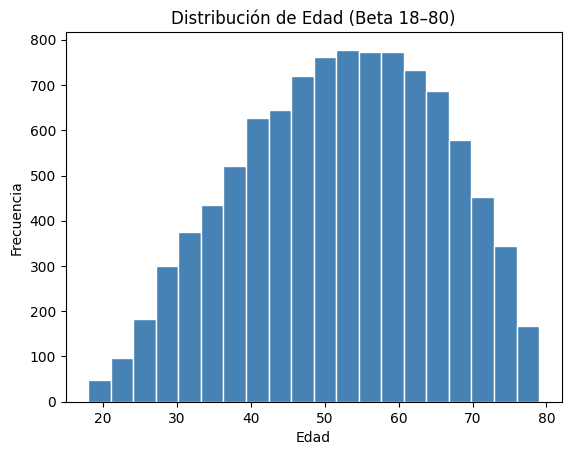

In [393]:
import matplotlib.pyplot as plt

plt.hist(generated_ages, bins=20, color='steelblue', edgecolor='white')
plt.title("Distribución de Edad (Beta 18–80)")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show()

Ahora veremos la grafica de la distribución de edades empírica. Observamos que sigue la distribución definida por 
los pesos en los bins, donde hay más frecuencia en los intervalos con mayor peso. En este caso, el intervalo de 
25 a 35 años tiene la mayor frecuencia, seguido por 35 a 45 años.

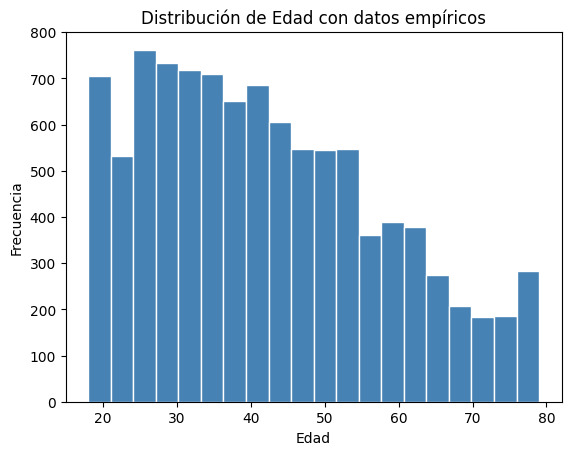

In [394]:
plt.hist(generated_ages_empirical, bins=20, color='steelblue', edgecolor='white')
plt.title("Distribución de Edad con datos empíricos")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show()

Ahora comprobaremos la distribución de alturas generadas. Veremos que sigue una distribución normal.

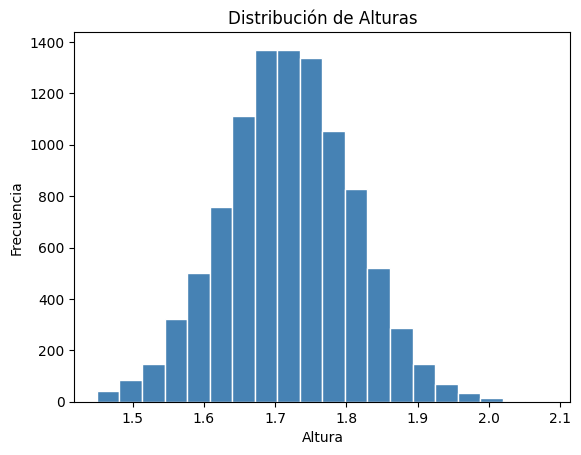

In [395]:
plt.hist(generated_heights, bins=20, color='steelblue', edgecolor='white')
plt.title("Distribución de Alturas")
plt.xlabel("Altura")
plt.ylabel("Frecuencia")
plt.show()

Finalmente, veremos un histograma de ingresos. Observaremos que la distribución
es asimétrica y tiene una cola larga a la derecha, típica de una distribución lognormal.

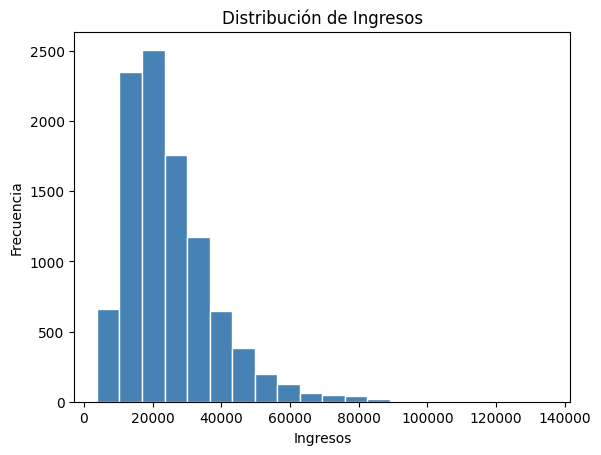

In [396]:
plt.hist(generated_income, bins=20, color='steelblue', edgecolor='white')
plt.title("Distribución de Ingresos")
plt.xlabel("Ingresos")
plt.ylabel("Frecuencia")
plt.show()

---
